In [1]:
novel_to_analyze = 'Desperate Remedies.txt'
novel_name = novel_to_analyze.split('.')[0]
print(novel_name)
## to all spreadsheets:
path_to_spreadsheets = '../../data/spreadsheets/'

Desperate Remedies


In [2]:
### Installs:
# conda install -c plotly plotly=5.7.0

In [3]:
import codecs
import os
import pandas as pd
# to be able to see more columns when dataframes are printed out:
# pd.set_option('display.max_columns', 100)
pd.set_option('display.max_columns', 1000,'display.max_colwidth', None, 'display.width', 1000, 'display.max_rows',1000)
# to not get copy warnings when splitting dataframes
pd.options.mode.chained_assignment = None
import re
import spacy
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
from nltk.tokenize import sent_tokenize

# Vis:
# import matplotlib
# import cufflinks as cf
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
# import plotly.offline as py
# import plotly.graph_objs as go

# cf.go_offline() # required to use plotly offline (no account required).
# py.init_notebook_mode() # graphs charts inline (IPython).

In [4]:
## to Newpaper Novel corpus:
path_to_nnovels_corpus = '../../data/corpora/corpus_newspaper_novels/' 

## to assets:
path_to_assets = '../../assets/'
## characters and numbers to exclude from texts:
exclude_file = 'characters_and_numbers_to_exclude.txt'

# characters to exclude
with codecs.open(path_to_assets + exclude_file, 'r', encoding='utf-8', errors="ignore") as characters_to_exclude_raw:
    characters_to_exclude = characters_to_exclude_raw.read()
    characters_to_exclude = characters_to_exclude.split()

In [5]:
with codecs.open(path_to_nnovels_corpus + novel_to_analyze, 'r', encoding='utf-8', errors="ignore") as raw_text:
    dirty_text = raw_text.read()

prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
dashes = "(--)+"

dirty_text = re.sub(prefixes,"\\1<prd>", dirty_text)
dirty_text = re.sub(dashes, ' \\1 ', dirty_text)
dirty_text = re.sub('(“|”)', '"', dirty_text)

clean_text_list = sent_tokenize(dirty_text)

clean_sentences = []
for sent in clean_text_list:
    # res.append(re.sub('\n', '', sent))
    # removing newline notations
    clean_sent = re.sub('\n', ' ', sent)
    clean_sent = re.sub('\r', ' ', clean_sent)
    # transforming multiple spaces to one space
    clean_sent = re.sub('\s+',' ', clean_sent)
    clean_sentences.append(clean_sent)
    
indexs = []

In [6]:
text_dict = {"sentences":clean_sentences}
df = pd.DataFrame.from_dict(text_dict)
df.head(10)

sentences
0                                                                                                                                                                                                                                                ﻿THE EVENTS OF THIRTY YEARS 1.
1                                                                                                                                                                                                                                                DECEMBER AND JANUARY, 1835-36.
2                                           In the long and intricately inwrought chain of circumstance which renders worthy of record some experiences of Cytherea Graye, Edward Springrove, and others, the first event directly influencing the issue was a Christmas visit.
3  In the above-mentioned year, 1835, Ambrose Graye, a young architect who had just begun the practice of his profession in the midland town of Hocbridge, to the north of Christminster, went to London to spend the Christmas holidays with a friend who lived in Bloomsbury.
4                                                                                                                                                        They had gone up to Cambridge in the same year, and, after graduating together, Huntway, the friend, had taken orders.
5                                                                                                                                                                                                                                        Graye was handsome, frank, and gentle.
6                                                                                                                                                  He had a quality of thought which, exercised on homeliness, was humour; on nature, picturesqueness; on abstractions, poetry.
7                                                                                                                                                                                                                                Being, as a rule, broadcast, it was all three.
8                                                                                                                                                                                                                          Of the wickedness of the world he was too forgetful.
9                                                                                                                                                              To discover evil in a new friend is to most people only an additional experience: to him it was ever a surprise.

In [7]:
df['is_upper'] = 0
for index, row in df.iterrows():
    text = row['sentences']
    if text.isupper():
        df.at[index, 'is_upper'] = 1
df = df[df.is_upper != 1]
df = df.drop('is_upper', 1)
df['narration_is_0_dialogue_is_1'] = 0
df.head()

/var/folders/qc/zp281qzs35s7jg8lywg995f00000gn/T/ipykernel_45747/1004584672.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



sentences  narration_is_0_dialogue_is_1
2                                           In the long and intricately inwrought chain of circumstance which renders worthy of record some experiences of Cytherea Graye, Edward Springrove, and others, the first event directly influencing the issue was a Christmas visit.                             0
3  In the above-mentioned year, 1835, Ambrose Graye, a young architect who had just begun the practice of his profession in the midland town of Hocbridge, to the north of Christminster, went to London to spend the Christmas holidays with a friend who lived in Bloomsbury.                             0
4                                                                                                                                                        They had gone up to Cambridge in the same year, and, after graduating together, Huntway, the friend, had taken orders.                             0
5                                                                                                                                                                                                                                        Graye was handsome, frank, and gentle.                             0
6                                                                                                                                                  He had a quality of thought which, exercised on homeliness, was humour; on nature, picturesqueness; on abstractions, poetry.                             0

In [8]:
dialogue_started = False
for index, row in df.iterrows():
    sent = row['sentences']
    if sent.startswith('"'):
        dialogue_started = True
    if dialogue_started:
        df.at[index, 'narration_is_0_dialogue_is_1'] = 1

        if sent.endswith('"'):
            dialogue_started = False
            
        else:
            continue
    else:
        df.at[index, 'narration_is_0_dialogue_is_1'] = 0

    # if index == 20:
    #     break

In [9]:
df.head(50)

sentences  narration_is_0_dialogue_is_1
2                                                                                                                                                                           In the long and intricately inwrought chain of circumstance which renders worthy of record some experiences of Cytherea Graye, Edward Springrove, and others, the first event directly influencing the issue was a Christmas visit.                             0
3                                                                                                                                  In the above-mentioned year, 1835, Ambrose Graye, a young architect who had just begun the practice of his profession in the midland town of Hocbridge, to the north of Christminster, went to London to spend the Christmas holidays with a friend who lived in Bloomsbury.                             0
4                                                                                                                                                                                                                                                                                        They had gone up to Cambridge in the same year, and, after graduating together, Huntway, the friend, had taken orders.                             0
5                                                                                                                                                                                                                                                                                                                                                                        Graye was handsome, frank, and gentle.                             0
6                                                                                                                                                                                                                                                                                  He had a quality of thought which, exercised on homeliness, was humour; on nature, picturesqueness; on abstractions, poetry.                             0
7                                                                                                                                                                                                                                                                                                                                                                Being, as a rule, broadcast, it was all three.                             0
8                                                                                                                                                                                                                                                                                                                                                          Of the wickedness of the world he was too forgetful.                             0
9                                                                                                                                                                                                                                                                                              To discover evil in a new friend is to most people only an additional experience: to him it was ever a surprise.                             0
10                                                                                                                                                                                                                               While in London he became acquainted with a retired officer in the Navy named Bradleigh, who, with his wife and their daughter, lived in a street not far from Russell Square.                             0
11                                                                                        

In [10]:
df["sentence_length"] = 0
for index, row in df.iterrows():
    df.at[index, "sentence_length"] = len(row["sentences"].split())
    

In [11]:
df.head(50)

sentences  narration_is_0_dialogue_is_1  sentence_length
2                                                                                                                                                                           In the long and intricately inwrought chain of circumstance which renders worthy of record some experiences of Cytherea Graye, Edward Springrove, and others, the first event directly influencing the issue was a Christmas visit.                             0               34
3                                                                                                                                  In the above-mentioned year, 1835, Ambrose Graye, a young architect who had just begun the practice of his profession in the midland town of Hocbridge, to the north of Christminster, went to London to spend the Christmas holidays with a friend who lived in Bloomsbury.                             0               45
4                                                                                                                                                                                                                                                                                        They had gone up to Cambridge in the same year, and, after graduating together, Huntway, the friend, had taken orders.                             0               20
5                                                                                                                                                                                                                                                                                                                                                                        Graye was handsome, frank, and gentle.                             0                6
6                                                                                                                                                                                                                                                                                  He had a quality of thought which, exercised on homeliness, was humour; on nature, picturesqueness; on abstractions, poetry.                             0               18
7                                                                                                                                                                                                                                                                                                                                                                Being, as a rule, broadcast, it was all three.                             0                9
8                                                                                                                                                                                                                                                                                                                                                          Of the wickedness of the world he was too forgetful.                             0               10
9                                                                                                                                                                                                                                                                                              To discover evil in a new friend is to most people only an additional experience: to him it was ever a surprise.                             0               22
10                                                                                                                                                                                                                               While in London he became acquainted with a retired officer in the Navy named Bradleigh, who, with his wife and their daughter, lived in a str

In [12]:
## POS tagging:

def progress(count, total, status=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))
    percents = round(100.1 * count / float(total), 1)
    bar = '#' * filled_len + '-' * (bar_len - filled_len)
    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
    sys.stdout.flush() 
    
# first loading english language support
nlp = spacy.load("en_core_web_sm")

## Takes in a dataframe and clean text column (as string), and returns the df with POS tags for all the texts
## Multiple columns are created, one for each POS tag, and one that contains all POS tags (I did this to more easily
## be able to grab POS percentages afterward)
def get_POS_tags_for_text_in_df(df, text_row_to_analyze='sentences'):
    # setting up column for pos counts
    df['all_pos_counts'] = ''
    df["parts_of_speech_total_count"] = ''
    # loop through df and get all POS tags:
    for index, row in df.iterrows():
        # show progress
        progress(index, len(df.index))
        
        # grab text
        text = row[text_row_to_analyze]
        
        # this is a memory buffer, to extend max length of available ram according to the text being analyzed
        # https://datascience.stackexchange.com/questions/38745/increasing-spacy-max-nlp-limit
        nlp.max_length = len(text) + 100
        
        # disable modules not in use to save memory
        analyzed_doc = nlp(text, disable = ['ner'])
        
        # grabbing all pos counts in the text in non-human readable format
        pos_counts_in_text = analyzed_doc.count_by(spacy.attrs.IDS['POS'])
        
        # setting up list to render pos hashes in human readable format:
        human_readable_pos_count_list = []
        
        # iterating through counts to make hashes human readable:
        for pos, count in pos_counts_in_text.items():
            human_readable_tag = analyzed_doc.vocab[pos].text
            # rendering as list to input back into df
            human_readable_tag_and_count = list((human_readable_tag, count))
            human_readable_pos_count_list.append(human_readable_tag_and_count)
        # looping through the human readable counts, assigning their label to the column
        # and the count to the row for each pos tag
        for element in human_readable_pos_count_list:
            df.at[index, 'POS_' + str(element[0])+'_count'] = element[1]
        
        # placing all the pos counts for each text in the all_pos_counts column
        df.at[index, 'all_pos_counts'] = human_readable_pos_count_list
        
        
    df = df.fillna(0)
    # getting POS percentages for each POS tag in texts
    # There are much easier and more efficient ways to do this rather than looping over the entire df again but we were pressed for time...
    # TODO: integrate this loop into previous loop
    for index, row in df.iterrows():
        total = 0.0
        for name in df.columns.values.tolist():
            if name.startswith("POS_"):
                # get total POS elements count for sanity
                total += row[name]
        try:
            df.at[index, "parts_of_speech_total_count"] = int(total)
        except Exception as e:
            print(e)
        for name in df.columns.values.tolist():
            if name.startswith("POS_"):
                # assign new name for column
                new_name = "%" + name
                # get % of total POS in text
                if total != 0:
                    percentage = round((row[name] / total) * float(100), 3)
                else:
                    print(row[text_row_to_analyze])
                # if this is the first index, create the column name to avoid errors
                if index == 0:
                    df[new_name] = 0.0
                df.at[index, new_name] = percentage
    return df

In [13]:

df = get_POS_tags_for_text_in_df(df, text_row_to_analyze='sentences')
df.head(10)

sentences  narration_is_0_dialogue_is_1  sentence_length                                                                                                                        all_pos_counts parts_of_speech_total_count  POS_ADP_count  POS_DET_count  POS_ADJ_count  POS_CCONJ_count  POS_ADV_count  POS_NOUN_count  POS_PRON_count  POS_VERB_count  POS_PROPN_count  POS_PUNCT_count  POS_AUX_count  POS_NUM_count  POS_PART_count  POS_SCONJ_count  POS_INTJ_count  POS_X_count  POS_SYM_count  %POS_ADP_count  %POS_DET_count  %POS_ADJ_count  %POS_CCONJ_count  %POS_ADV_count  %POS_NOUN_count  %POS_PRON_count  %POS_VERB_count  %POS_PROPN_count  %POS_PUNCT_count  %POS_AUX_count  %POS_NUM_count  %POS_PART_count  %POS_SCONJ_count  \
2                                            In the long and intricately inwrought chain of circumstance which renders worthy of record some experiences of Cytherea Graye, Edward Springrove, and others, the first event directly influencing the issue was a Christmas visit.                             0               34               [[ADP, 4], [DET, 5], [ADJ, 4], [CCONJ, 2], [ADV, 2], [NOUN, 8], [PRON, 1], [VERB, 2], [PROPN, 5], [PUNCT, 4], [AUX, 1]]                          38            4.0            5.0            4.0              2.0            2.0             8.0             1.0             2.0              5.0              4.0            1.0            0.0             0.0              0.0             0.0          0.0            0.0          10.526          13.158          10.526             5.263           5.263           21.053            2.632            5.263            13.158            10.526           2.632           0.000            0.000             0.000   
3   In the above-mentioned year, 1835, Ambrose Graye, a young architect who had just begun the practice of his profession in the midland town of Hocbridge, to the north of Christminster, went to London to spend the Christmas holidays with a friend who lived in Bloomsbury.                             0               45      [[ADP, 9], [DET, 7], [ADV, 2], [PUNCT, 7], [VERB, 5], [NOUN, 8], [NUM, 1], [PROPN, 8], [ADJ, 1], [PRON, 3], [AUX, 1], [PART, 1]]                          53            9.0            7.0            1.0              0.0            2.0             8.0             3.0             5.0              8.0              7.0            1.0            1.0             1.0              0.0             0.0          0.0            0.0          16.981          13.208           1.887             0.000           3.774           15.094            5.660            9.434            15.094            13.208           1.887           1.887            1.887             0.000   
4                                                                                                                                                         They had gone up to Cambridge in the same year, and, after graduating together, Huntway, the friend, had taken orders.                             0               20               [[PRON, 1], [AUX, 2], [VERB, 3], [ADP, 4], [PROPN, 2], [DET, 2], [ADJ, 1], [NOUN, 3], [PUNCT, 6], [CCONJ, 1], [ADV, 1]]                          26            4.0            2.0            1.0              1.0            1.0             3.0             1.0             3.0              2.0              6.0            2.0            0.0             0.0              0.0             0.0          0.0            0.0          15.385           7.692           3.846             3.846           3.846           11.538            3.846           11.538             7.692            23.077           7.692           0.000            0.000             0.000   
5                                                                                                                                                                                                                                         Graye was handsome, frank, and gentle.                             0             

In [14]:
### FUNCTIONS 2/3

## This function takes in a list of dataframes, a list of columns to visualize, and a date column (with the same name in both dataframes)
## then plots those columns over time.

def visualize_numerical_columns__over_time(dfs, list_of_columns_to_visualize, date_column='location', graph_y_label='What are we counting?', title='SOMETHING over the novel'):
    # Setting lists to capture the elements for visualization
    years_list = []
    counts_list = []
    labels_list = []
    colors_list = []
    
    # lazy way to grab some relevant info to have comparison points when looking at visuals
    print_info = []
    
    # the first dataframe in the list will be "DF_0", the second "DF_1", and so on.
    # in our case, DF_0 == df_nnovels_meta and DF_1 == df_txtlab_meta
    which_df = 0
    # loops for each df in list
    for df in dfs:
        # loops for each column in list
        for column_name in list_of_columns_to_visualize:
            
            # first grouping the specific column by year
            grouped_by_year = pd.to_numeric(df[column_name]).groupby(df[date_column])
            grouped_by_year = grouped_by_year.mean().reset_index()
            
            # grabbing the array of the years 
            years = np.array(grouped_by_year[date_column].tolist())
            # grabbing the array of the column we're visualizing
            count_to_visualize = np.array(grouped_by_year[column_name].tolist())
            
            # placing these elements in a list, and grabbing a label to know which DF is which
            years_list.append(years)
            counts_list.append(count_to_visualize)
            labels_list.append("DF_"+ str(which_df) +"_"+ column_name)
            
            # getting random colors to visualize
            r = random.random()
            b = random.random()
            g = random.random()
            color = (r, g, b)
            colors_list.append(color)
            
            # lazy way to add additional info 
            print_info.append(["The AVG of " + column_name + " of DF_" + str(which_df) +" is "+ str(df[column_name].mean())])
            print_info.append(["The MIN of " + column_name + " of DF_" + str(which_df) +" is "+ str(df[column_name].min())])
            print_info.append(["The MAX of " + column_name + " of DF_" + str(which_df) +" is "+ str(df[column_name].max())])
            
        # once loop finishes, increment DF number    
        which_df += 1
        
    # setting the size of the plot
    plt.figure(figsize=(20,10))
    # looping through the labels we added (essentially each DF), and plotting the elements sequentially using the index for each of the lists created above
    for index in range(len(labels_list)):
        plt.plot(years_list[index], counts_list[index], label=labels_list[index], c=colors_list[index])
    # showing the plot    
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()
    
    # printing out supplementary info
    for info in print_info:
        print(info)
        
    return None

In [15]:
dfs = [df]


In [17]:
### Divide the DF into 5 sections and understand changes that happen in those sections:

list_of_elements_to_analyze = ['%POS_NOUN_count', '%POS_DET_count', '%POS_ADP_count', '%POS_PROPN_count', '%POS_ADJ_count', '%POS_ADV_count', '%POS_PRON_count', '%POS_VERB_count', '%POS_AUX_count', 'sentence_length']
N = 3
# columns_in_df = df2.columns.values.tolist()
print(f"Printing out information for {novel_to_analyze}. The DF is split into {N} sections.")
for name in list_of_elements_to_analyze:
    # if name.startswith("%"):
    split_arrays = np.array_split(df[name], N)
    print(f"The POS tag being shown is {name}.")
    for i in range(N):
        mean_of_section = split_arrays[i].mean()
        max_of_section = split_arrays[i].max()
        min_of_section = split_arrays[i].min()
        median_of_section = split_arrays[i].median()
        print(f"SECTION {i}: The MEAN value is: {mean_of_section}. The MAX value is: {max_of_section}. The MIN value is: {min_of_section}. The MEDIAN value is: {median_of_section}.")


Printing out information for Desperate Remedies.txt. The DF is split into 3 sections.
The POS tag being shown is %POS_NOUN_count.
SECTION 0: The MEAN value is: 13.339956908665123. The MAX value is: 37.5. The MIN value is: 0.0. The MEDIAN value is: 13.793.
SECTION 1: The MEAN value is: 13.075786885245929. The MAX value is: 50.0. The MIN value is: 0.0. The MEDIAN value is: 13.462.
SECTION 2: The MEAN value is: 13.93980983606562. The MAX value is: 50.0. The MIN value is: 0.0. The MEDIAN value is: 14.286.
The POS tag being shown is %POS_DET_count.
SECTION 0: The MEAN value is: 7.399834192037474. The MAX value is: 33.333. The MIN value is: 0.0. The MEDIAN value is: 7.143.
SECTION 1: The MEAN value is: 7.807572365339579. The MAX value is: 42.857. The MIN value is: 0.0. The MEDIAN value is: 7.692.
SECTION 2: The MEAN value is: 8.474127400468399. The MAX value is: 33.333. The MIN value is: 0.0. The MEDIAN value is: 8.333.
The POS tag being shown is %POS_ADP_count.
SECTION 0: The MEAN value is:

In [18]:
print(df.columns.tolist())

['sentences', 'narration_is_0_dialogue_is_1', 'sentence_length', 'all_pos_counts', 'parts_of_speech_total_count', 'POS_ADP_count', 'POS_DET_count', 'POS_ADJ_count', 'POS_CCONJ_count', 'POS_ADV_count', 'POS_NOUN_count', 'POS_PRON_count', 'POS_VERB_count', 'POS_PROPN_count', 'POS_PUNCT_count', 'POS_AUX_count', 'POS_NUM_count', 'POS_PART_count', 'POS_SCONJ_count', 'POS_INTJ_count', 'POS_X_count', 'POS_SYM_count', '%POS_ADP_count', '%POS_DET_count', '%POS_ADJ_count', '%POS_CCONJ_count', '%POS_ADV_count', '%POS_NOUN_count', '%POS_PRON_count', '%POS_VERB_count', '%POS_PROPN_count', '%POS_PUNCT_count', '%POS_AUX_count', '%POS_NUM_count', '%POS_PART_count', '%POS_SCONJ_count', '%POS_INTJ_count', '%POS_X_count', '%POS_SYM_count']


In [19]:
# https://github.com/vaclavdekanovsky/data-analysis-in-examples/blob/master/Vizualizations/Plotly/Histogram/Histograms.ipynb


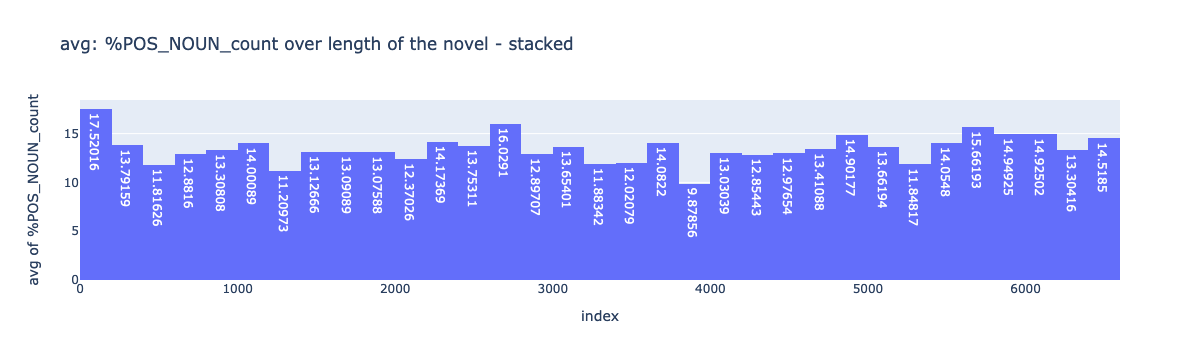

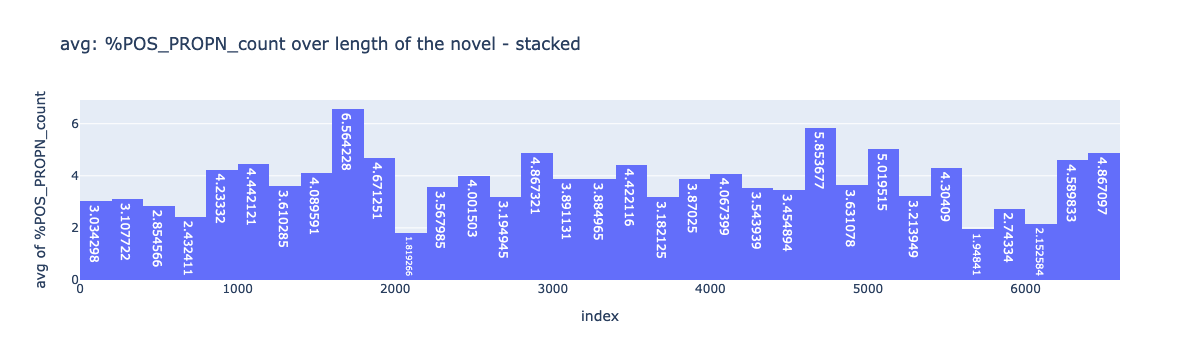

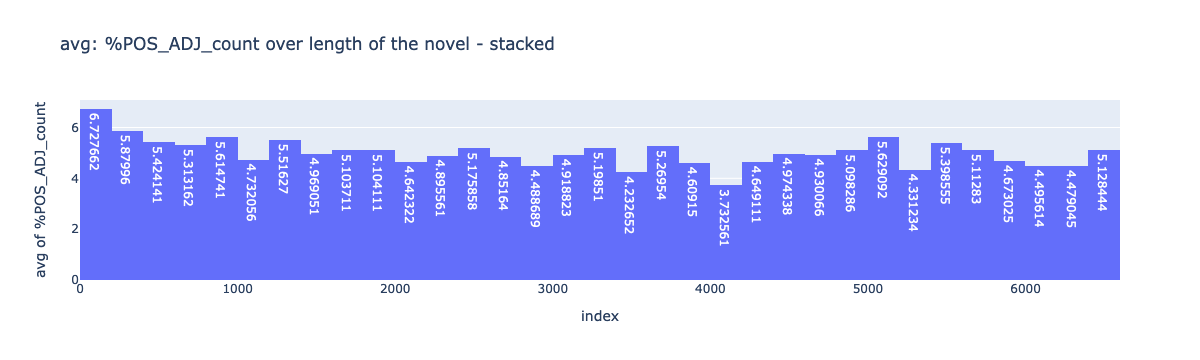

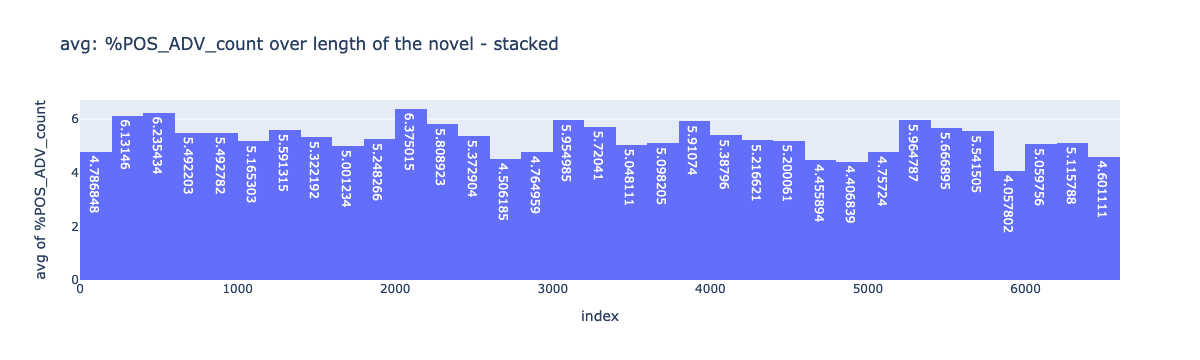

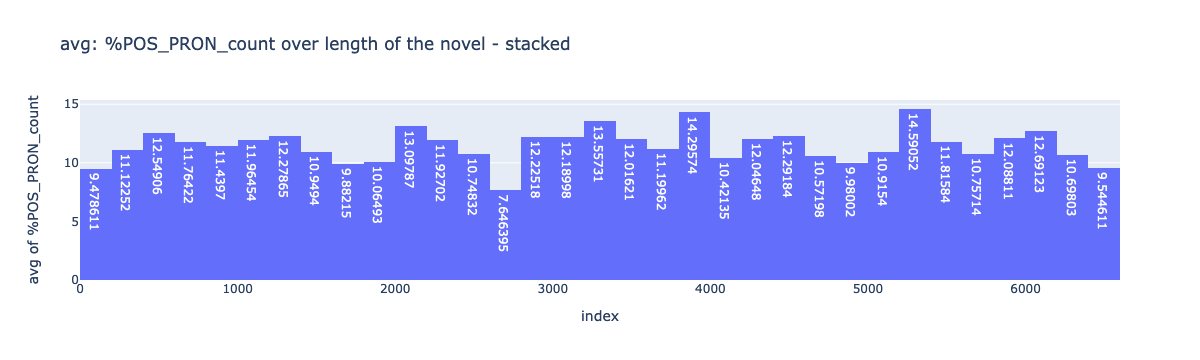

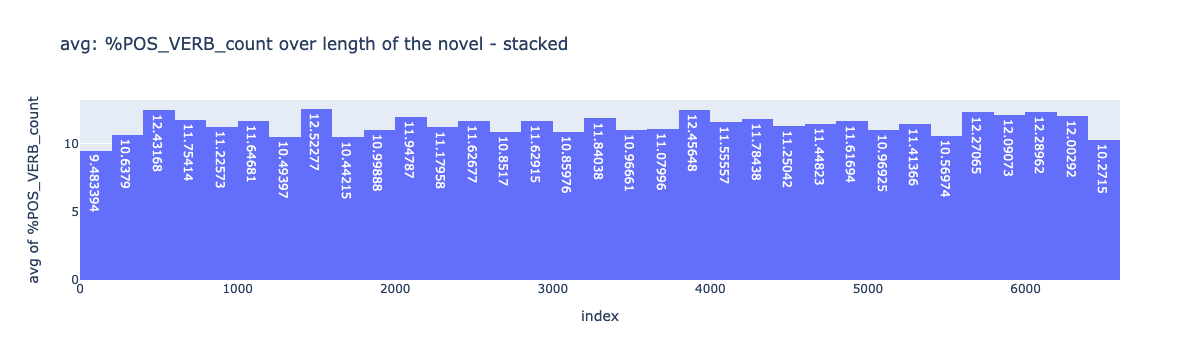

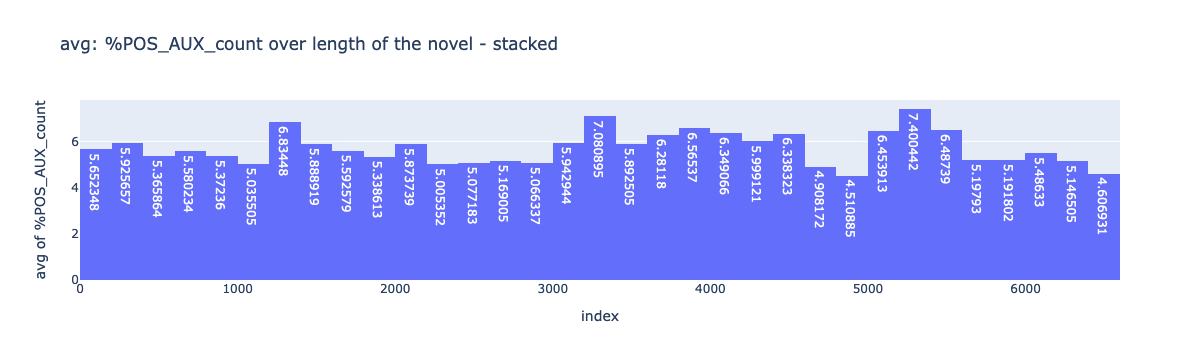

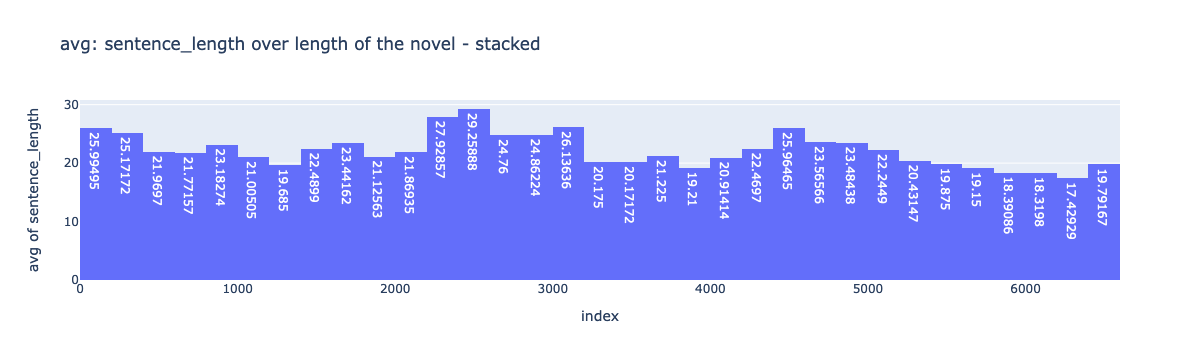

In [21]:
# for barmode in ["stack", "overlay", "group"]:
# for histfunc in ["avg","min","max"]:

# list_of_elements_to_analyze = ['%POS_NOUN_count', '%POS_DET_count', '%POS_ADP_count', '%POS_PROPN_count', '%POS_ADJ_count', '%POS_ADV_count', '%POS_PRON_count', '%POS_VERB_count', '%POS_AUX_count', 'sentence_length']
list_of_elements_to_analyze = ['%POS_NOUN_count', '%POS_PROPN_count', '%POS_ADJ_count', '%POS_ADV_count', '%POS_PRON_count', '%POS_VERB_count', '%POS_AUX_count', 'sentence_length']

for element in list_of_elements_to_analyze:
    for histfunc in ["avg"]:
        fig = px.histogram(df, 
                           x=df.index,
                           nbins=50,
                           y=element,
                           #color="narration_is_0_dialogue_is_1", 
                           barmode='stack',
                           histfunc=histfunc,
                           text_auto=True,
                           title=f"{histfunc}: {element} over length of the novel - stacked")
        fig.show()



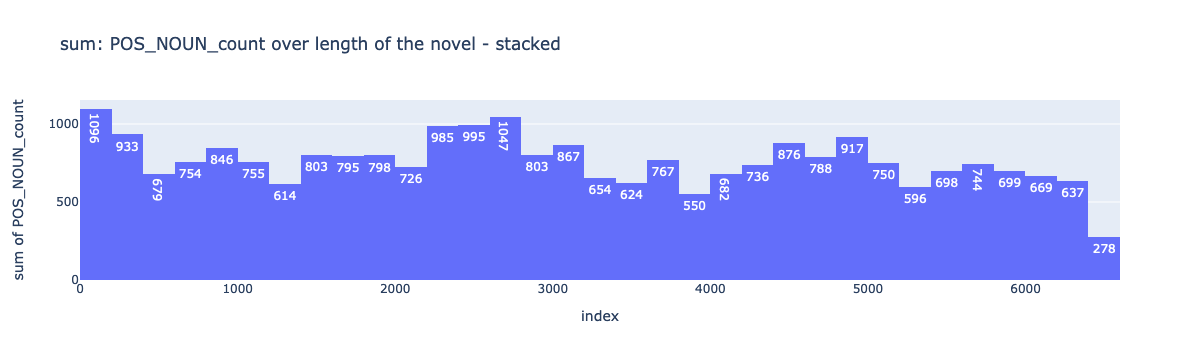

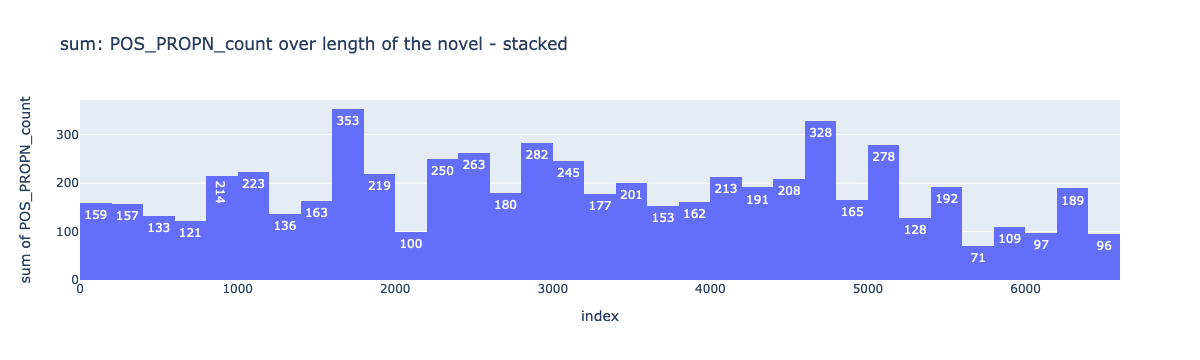

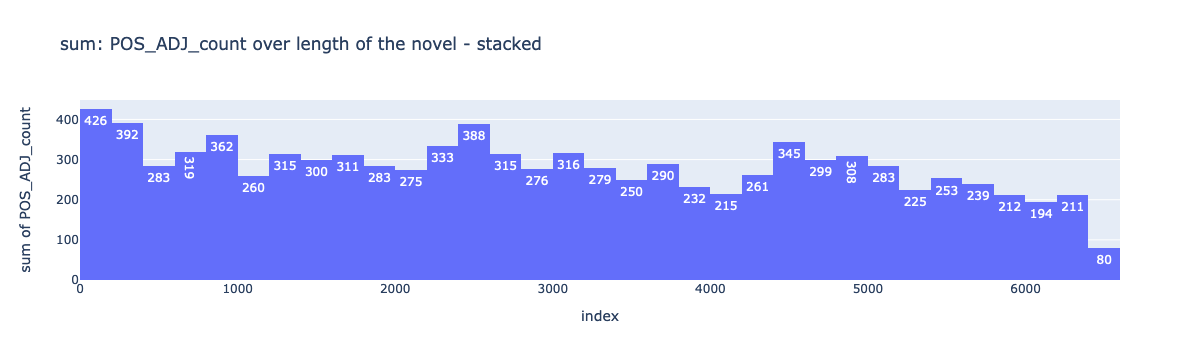

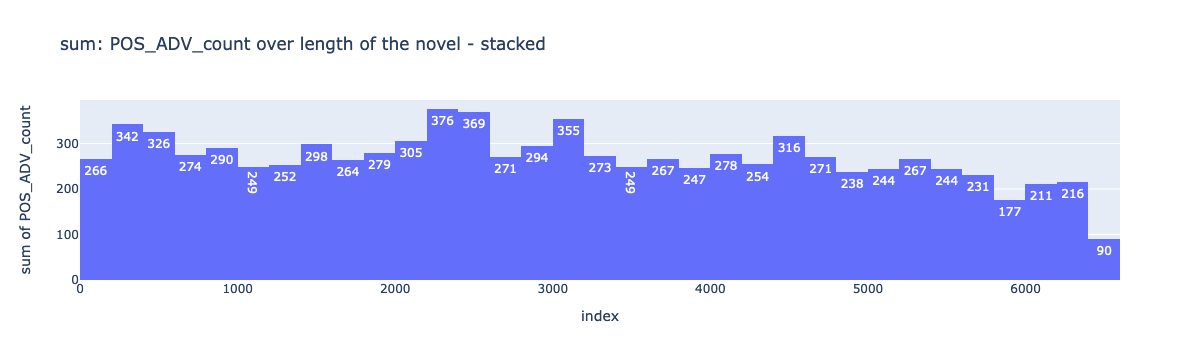

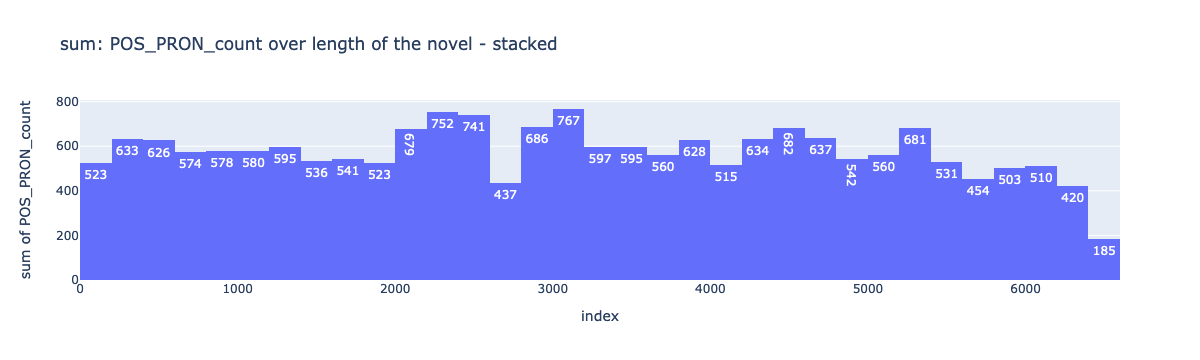

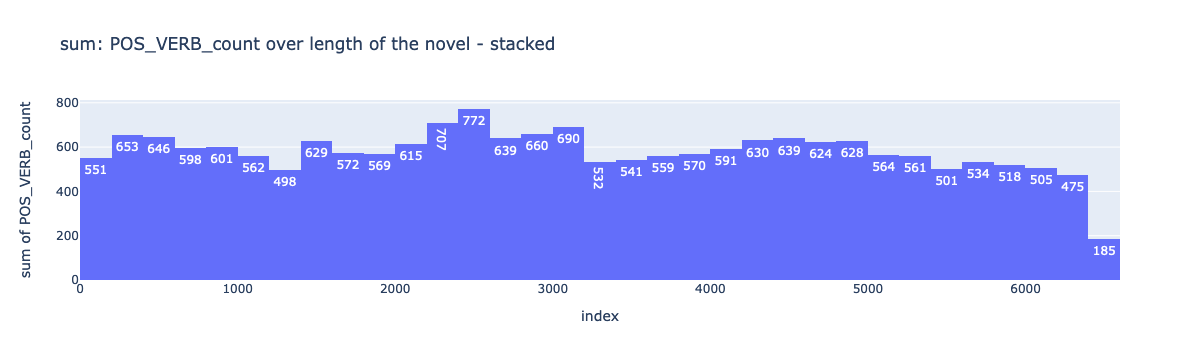

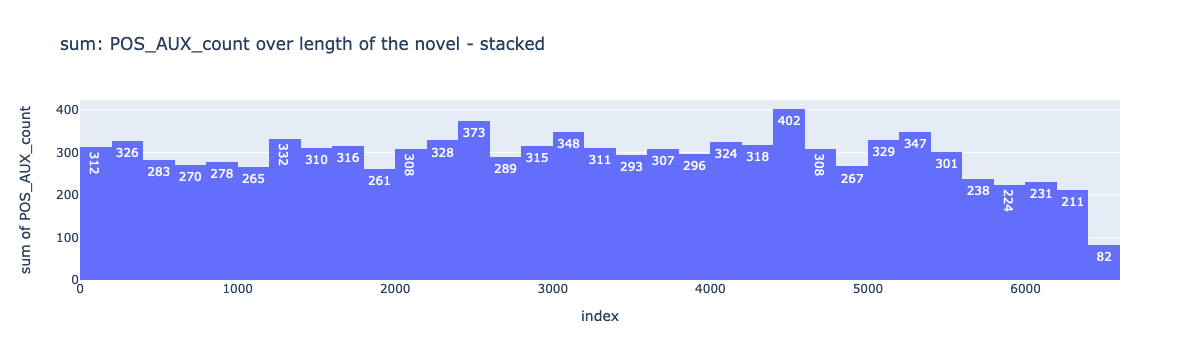

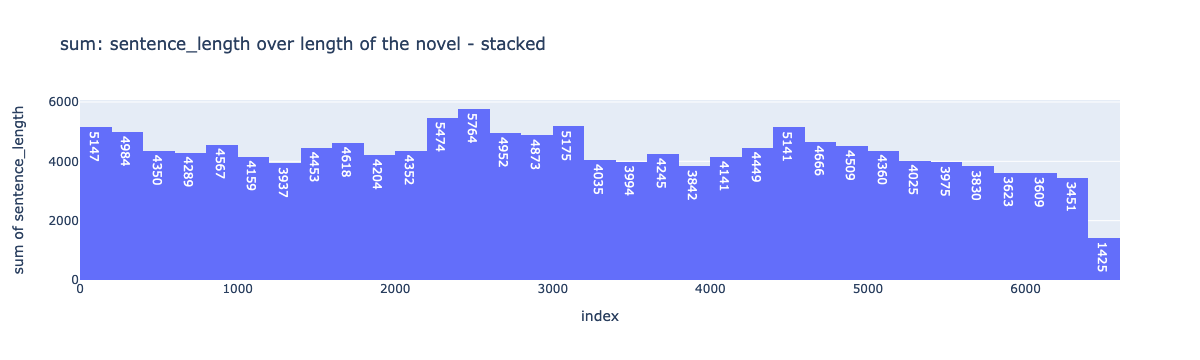

In [23]:
# for barmode in ["stack", "overlay", "group"]:
# for histfunc in ["avg","min","max"]:

# list_of_elements_to_analyze = ['%POS_NOUN_count', '%POS_DET_count', '%POS_ADP_count', '%POS_PROPN_count', '%POS_ADJ_count', '%POS_ADV_count', '%POS_PRON_count', '%POS_VERB_count', '%POS_AUX_count', 'sentence_length']
list_of_elements_to_analyze = ['POS_NOUN_count', 'POS_PROPN_count', 'POS_ADJ_count', 'POS_ADV_count', 'POS_PRON_count', 'POS_VERB_count', 'POS_AUX_count', 'sentence_length']

for element in list_of_elements_to_analyze:
    for histfunc in ["sum"]:
        fig = px.histogram(df, 
                           x=df.index,
                           nbins=50,
                           y=element,
                           #color="narration_is_0_dialogue_is_1", 
                           barmode='stack',
                           histfunc=histfunc,
                           text_auto=True,
                           title=f"{histfunc}: {element} over length of the novel - stacked")
        fig.show()


In [24]:
### FUNCTIONS 6/6

## Functions that 1) save just metadata, 2) save the full dataframe, 3) load the dataframe

# for metadata output:
def output_metadata(df, spreadsheet_name='FILL_IN_SPREADSHEET_NAME_META', path_to_spreadsheets=path_to_spreadsheets):
    # setting up list of columns NOT to export (since this is just metadata)
    list_of_columns_not_to_include = ['words_standardized_stopped', 'sentences_standardized_stopless','words_as_string_for_vectorizor', 'dirty_text', 'sentences']
    # all other columns are included
    columns_to_include = [column_name for column_name in df.columns.values.tolist() if column_name.lower() not in list_of_columns_not_to_include]
    df_meta = df[columns_to_include]
    df_meta.to_csv(path_to_spreadsheets + spreadsheet_name + '.csv')
    print(spreadsheet_name + ' was saved in '+str(path_to_spreadsheets))
    
# for full output:
def output_full(df, spreadsheet_name='FILL_IN_SPREADSHEET_NAME_FULL', path_to_spreadsheets=path_to_spreadsheets):
    df.to_csv(path_to_spreadsheets + spreadsheet_name + '.csv')
    print(spreadsheet_name + ' was saved in '+str(path_to_spreadsheets))

# load a dataframe
def open_df_and_print(file_name='df_full.csv', path_to_spreadsheets=path_to_spreadsheets, drop_first_column=False):
    df = pd.read_csv(path_to_spreadsheets + file_name, engine='python')
    if drop_first_column == True:
        df.drop(df.columns[0], axis=1, inplace=True)
    return df
    


In [25]:
output_full(df, spreadsheet_name=f'df_{novel_name}_full', path_to_spreadsheets=path_to_spreadsheets)
output_metadata(df, spreadsheet_name=f'df_{novel_name}_meta', path_to_spreadsheets=path_to_spreadsheets)

df_Desperate Remedies_full was saved in ../../data/spreadsheets/
df_Desperate Remedies_meta was saved in ../../data/spreadsheets/
